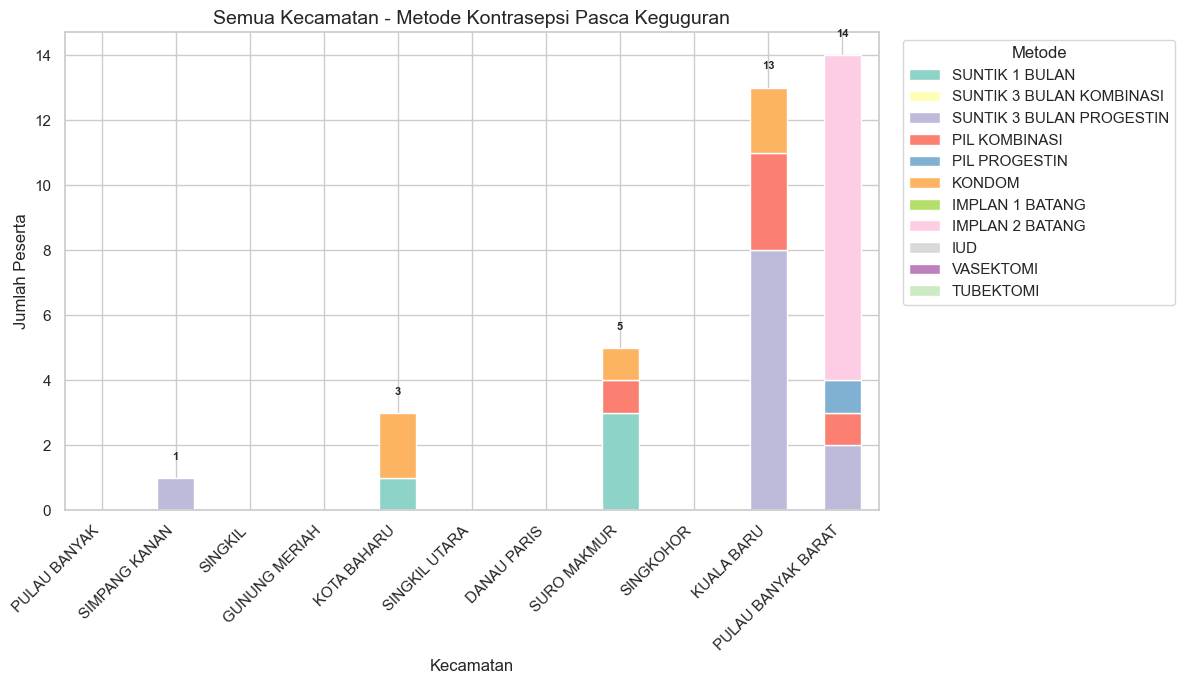

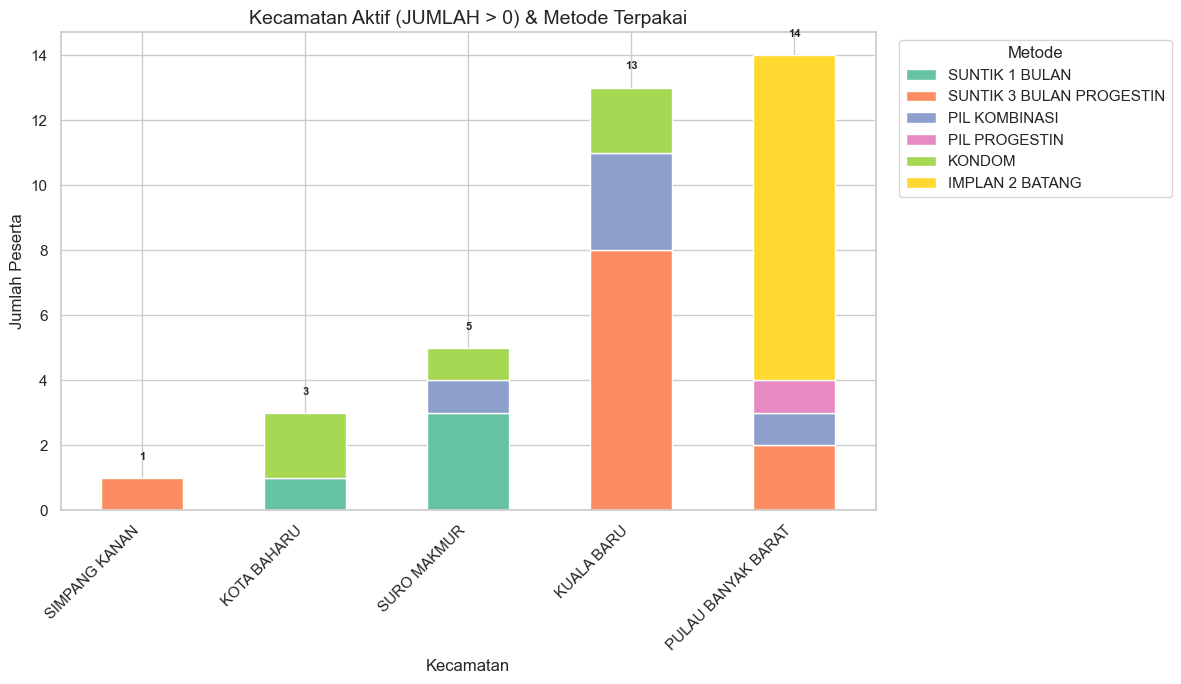

C:\Users\iksan\AppData\Local\Temp\ipykernel_31296\2524421254.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=total_per_metode.values, y=total_per_metode.index, palette="rocket")


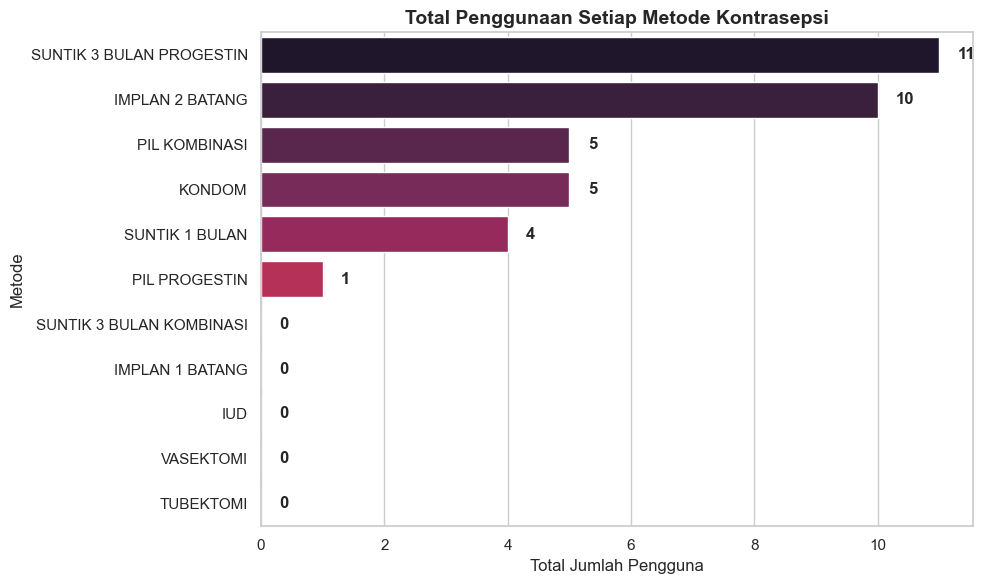

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set gaya visual
sns.set(style="whitegrid")

# Buat folder output jika belum ada
os.makedirs("output", exist_ok=True)

# Data
data = {
    "KODE": ["01", "02", "04", "06", "09", "10", "11", "12", "13", "14", "16"],
    "KECAMATAN": [
        "PULAU BANYAK", "SIMPANG KANAN", "SINGKIL", "GUNUNG MERIAH", "KOTA BAHARU",
        "SINGKIL UTARA", "DANAU PARIS", "SURO MAKMUR", "SINGKOHOR", "KUALA BARU", "PULAU BANYAK BARAT"
    ],
    "JUMLAH": [0, 1, 0, 0, 3, 0, 0, 5, 0, 13, 14],
    "SUNTIK 1 BULAN": [0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0],
    "SUNTIK 3 BULAN KOMBINASI": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "SUNTIK 3 BULAN PROGESTIN": [0, 1, 0, 0, 0, 0, 0, 0, 0, 8, 2],
    "PIL KOMBINASI": [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1],
    "PIL PROGESTIN": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    "KONDOM": [0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0],
    "IMPLAN 1 BATANG": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "IMPLAN 2 BATANG": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10],
    "IUD": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "VASEKTOMI": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "TUBEKTOMI": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Kolom metode kontrasepsi
metode = [
    "SUNTIK 1 BULAN",
    "SUNTIK 3 BULAN KOMBINASI",
    "SUNTIK 3 BULAN PROGESTIN",
    "PIL KOMBINASI",
    "PIL PROGESTIN",
    "KONDOM",
    "IMPLAN 1 BATANG",
    "IMPLAN 2 BATANG",
    "IUD",
    "VASEKTOMI",
    "TUBEKTOMI"
]

# ---------------------
# Plot 1: Semua Kecamatan
# ---------------------
df_all = df.set_index("KECAMATAN")[metode]
colors_all = sns.color_palette("Set3", n_colors=len(metode))

fig1, ax1 = plt.subplots(figsize=(12, 7))
df_all.plot(kind="bar", stacked=True, color=colors_all, ax=ax1)

# Hitung total per kecamatan
totals = df_all.sum(axis=1)

# Tambahkan label total jika total ≥ 1
for idx, total in enumerate(totals):
    if total >= 1:
        ax1.text(
            idx,
            total + 0.5,
            str(int(total)),
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold'
        )

plt.title("Semua Kecamatan - Metode Kontrasepsi Pasca Keguguran", fontsize=14)
plt.ylabel("Jumlah Peserta")
plt.xlabel("Kecamatan")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metode", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig("output/plot_semua_kecamatan.png", dpi=300)
plt.show()


# ---------------------
# Plot 2: Kecamatan Aktif (JUMLAH > 0) & Metode Terpakai
# ---------------------
df_filtered = df[df["JUMLAH"] > 0].copy()
df_metode_only = df_filtered.set_index("KECAMATAN")[metode]
df_metode_only = df_metode_only.loc[:, df_metode_only.sum() > 0]

colors_filtered = sns.color_palette("Set2", n_colors=df_metode_only.shape[1])

fig2, ax2 = plt.subplots(figsize=(12, 7))
df_metode_only.plot(kind="bar", stacked=True, color=colors_filtered, ax=ax2)

# Tambahkan label total peserta per bar
totals2 = df_metode_only.sum(axis=1)
for idx, total in enumerate(totals2):
    ax2.text(idx, total + 0.5, str(int(total)), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title("Kecamatan Aktif (JUMLAH > 0) & Metode Terpakai", fontsize=14)
plt.ylabel("Jumlah Peserta")
plt.xlabel("Kecamatan")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metode", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig("output/plot_kecamatan_aktif.png", dpi=300)
plt.show()

# ---------------------
# Plot 3: Total per Metode Kontrasepsi (Descending & Highlight)
# ---------------------
total_per_metode = df[metode].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x=total_per_metode.values, y=total_per_metode.index, palette="rocket")

# Tambahkan nilai di ujung bar
for i, v in enumerate(total_per_metode.values):
    ax3.text(v + 0.3, i, str(int(v)), va="center", fontweight='bold')

plt.title("Total Penggunaan Setiap Metode Kontrasepsi", fontsize=14, weight='bold')
plt.xlabel("Total Jumlah Pengguna")
plt.ylabel("Metode")
plt.tight_layout()
plt.savefig("output/plot_total_metode.png", dpi=300)
plt.show()
